# Dependance of Transmission vs H2O xairmass

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/24
- last update : 2024/12/03

This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
from getObsAtmo.getObsAtmo import ObsAtmo,validateObsName,Dict_Of_sitesPressures,getObsSiteDataFrame

# Check information

In [4]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [5]:
obssitename = 'LSST'
obs_str = validateObsName(obssitename) 
std_pressure = Dict_Of_sitesPressures[obs_str]

In [6]:
emul =  ObsAtmo(obs_str= obssitename)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

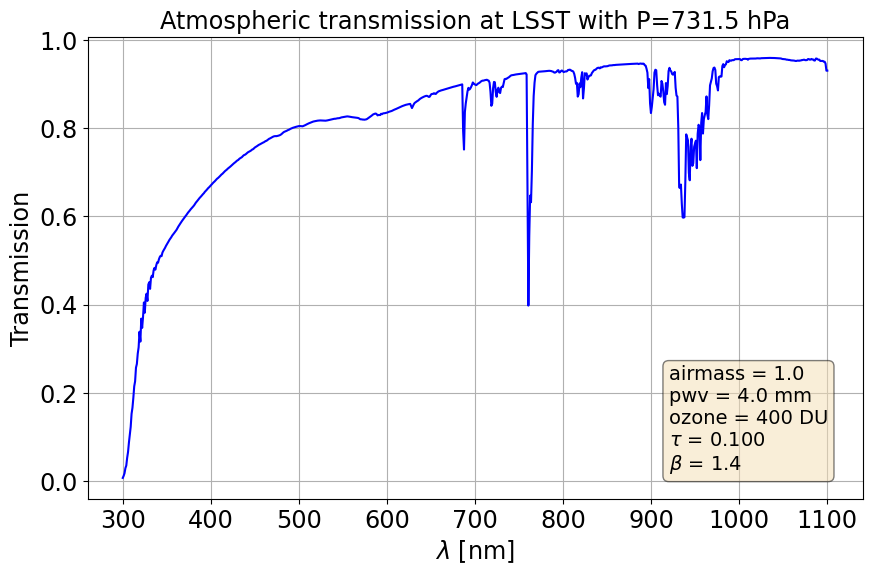

In [7]:
emul.plot_transmission()

# Setting atmospheric parameters

In [8]:
WL = emul.GetWL()
airmasses = emul.AIRMASS
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

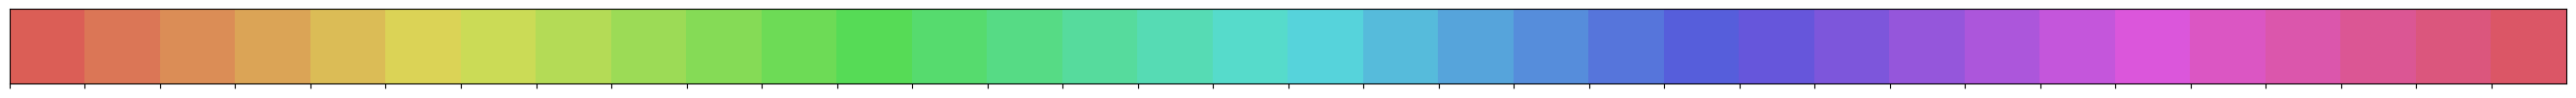

In [9]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with PWV absorption

Expect no difference

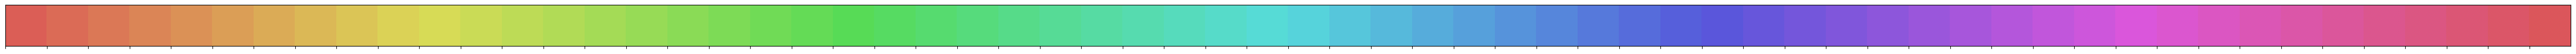

In [10]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


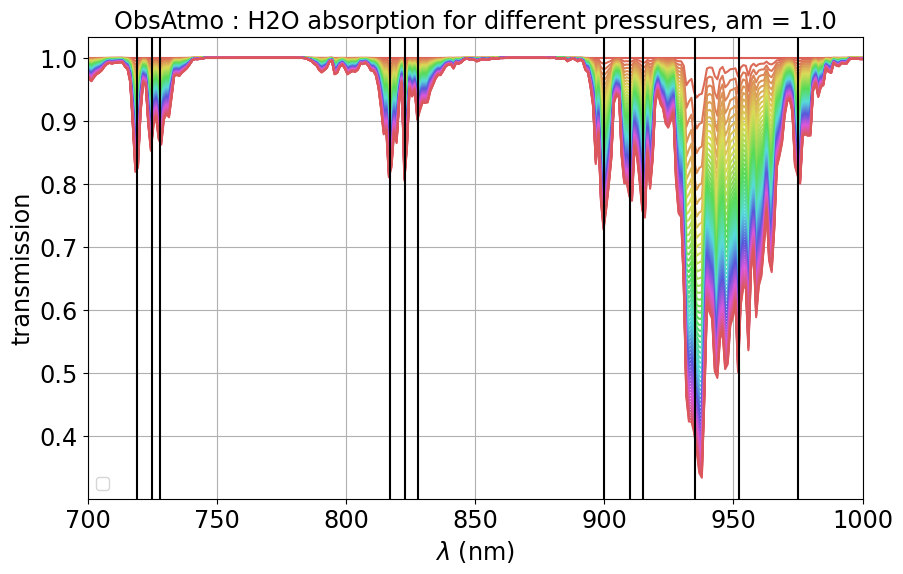

In [11]:
am =1

fig, ax = plt.subplots()
for idx,pwv in enumerate(pwvs):

    transm = emul.GetPWVabsTransparencyArray(WL,am,pwv)
  
    if idx == 0: 
        ax.plot(WL,transm,"-",color=hls_colors[idx])
    else: 
        ax.plot(WL,transm,"-",color=hls_colors[idx])
        
title = f"ObsAtmo : H2O absorption for different pressures, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

ax.axvline(719.0,color="k")
ax.axvline(725.0,color="k")
ax.axvline(728.0,color="k")
ax.axvline(817.0,color="k")
ax.axvline(823.0,color="k")
ax.axvline(828.0,color="k")
ax.axvline(900.0,color="k")
ax.axvline(910.0,color="k")
ax.axvline(915.0,color="k")
ax.axvline(935.0,color="k")
ax.axvline(952.0,color="k")
ax.axvline(975.0,color="k")

plt.show()

## Predefine a series of wavelengths

In [12]:
WLtest = np.array([719.,725.,728.,817.,823.,828.,900.,910.,915.,935.,952.,975.])
NWLtest = len(WLtest)
#hls_colors = sns.color_palette("Spectral_r", NWLtest)
hls_colors = sns.color_palette("coolwarm",NWLtest)
#sns.palplot(hls_colors)

In [13]:
binnumber = np.digitize(WLtest,WLtest)
binnumber

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Pick a palette from 700 to 1000 nm

In [14]:
#WLrange = np.arange(700.,1001.,1)
#NWLrange = len(WLrange)
#hls_colors = sns.color_palette("Spectral_r", NWLrange)
#hls_colors = sns.color_palette("coolwarm",NWLrange)
#sns.palplot(hls_colors)
#binnumber = np.digitize(WLtest,WLrange)
#binnumber

## Different values of PWV0 and different airmasses

In [15]:
#all_pwv0 = np.arange(0.1,12,2)
all_pwv0 = np.logspace(-1,1,8)
all_pwv0

array([ 0.1       ,  0.19306977,  0.37275937,  0.71968567,  1.38949549,
        2.6826958 ,  5.17947468, 10.        ])

In [16]:
linestyles = ["-","--","-.",":",  "-","--","-.",":"]
linewidths = [4,4,4,4,2,2,2,2]

## Plot

### Plot linear scale

Text(0.5, 1.0, 'PWV Air transmission vs $airmass \\times pwv$')

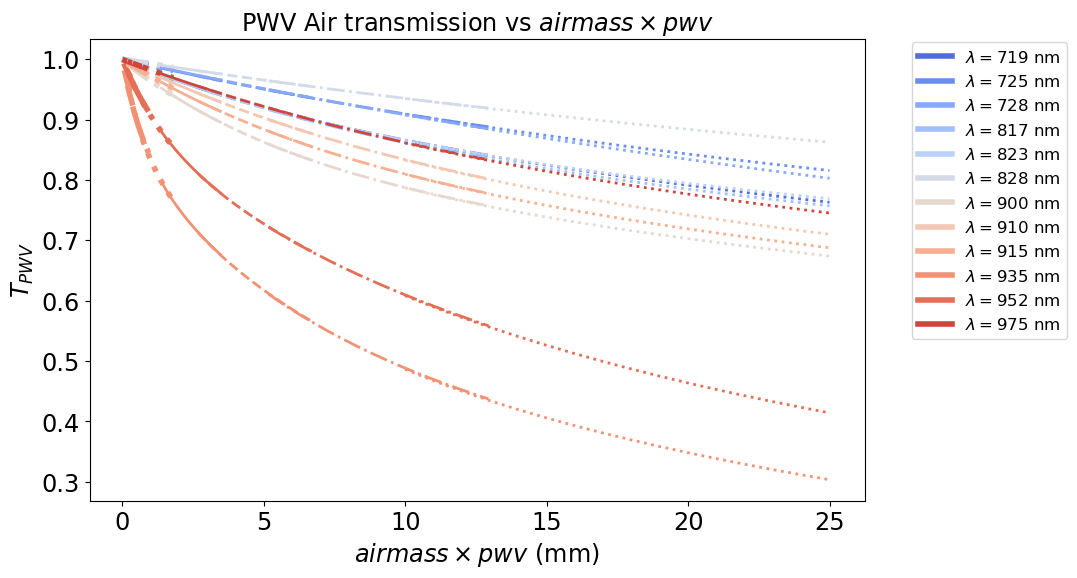

In [17]:
fig,ax = plt.subplots(1,1)

# external loop on PWV0 (linestyles and width)

for idx_pwv,pwv0 in enumerate(all_pwv0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetPWVabsTransparencyArray(WLtest,airmass,pwv0)
    # normalize wrt airmass = 1 for each wavelength
    #norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = airmasses*pwv0
        y = transmarray[:,idx_wl]
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_pwv]
        lw = linewidths[idx_pwv]

        if idx_pwv==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass \\times pwv$ (mm)")  
ax.set_ylabel("$T_{PWV}$")  
ax.set_title("PWV Air transmission vs $airmass \\times pwv$")

Text(0.5, 1.0, 'PWV Air extinction vs $airmass \\times pwv$')

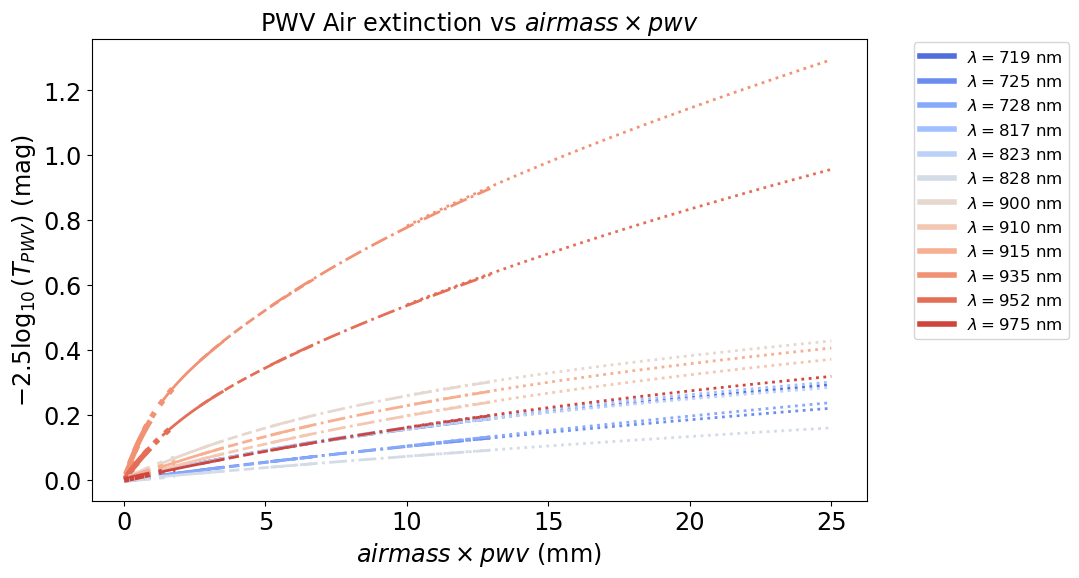

In [18]:
fig,ax = plt.subplots(1,1)

# external loop on PWV0 (linestyles and width)

for idx_pwv,pwv0 in enumerate(all_pwv0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetPWVabsTransparencyArray(WLtest,airmass,pwv0)
    # normalize wrt airmass = 1 for each wavelength
    norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = airmasses*pwv0
        y = - 2.5*np.log10(transmarray[:,idx_wl])
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_pwv]
        lw = linewidths[idx_pwv]

        if idx_pwv==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='lower right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$airmass \\times pwv$ (mm)")  
ax.set_ylabel("$-2.5 \\log_{10}(T_{PWV})$ (mag)")  
ax.set_title("PWV Air extinction vs $airmass \\times pwv$")

Text(0.5, 1.0, 'PWV Air extinction vs $airmass \\times pwv$')

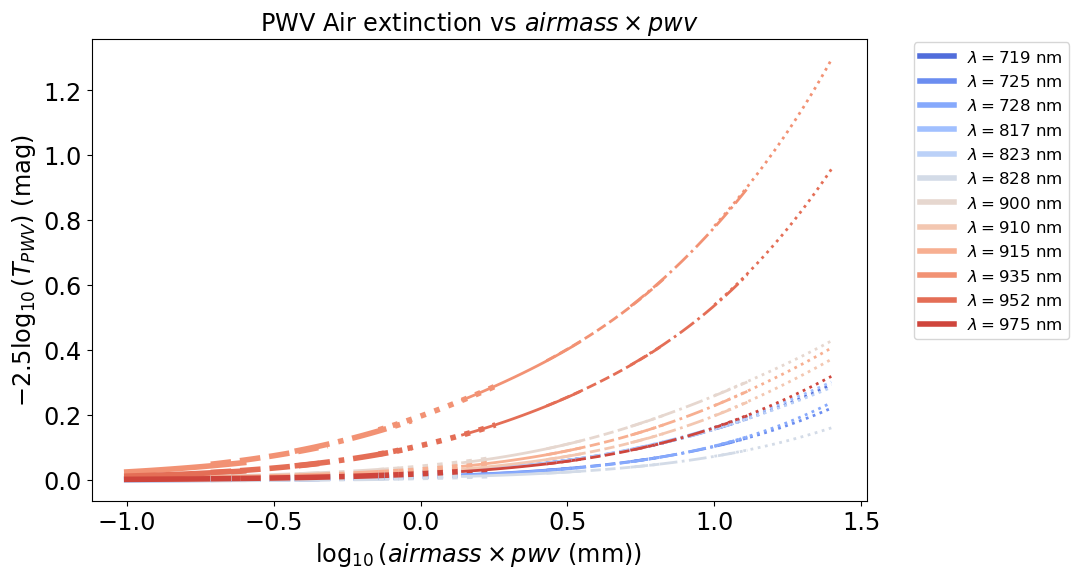

In [19]:
fig,ax = plt.subplots(1,1)

# external loop on PWV0 (linestyles and width)

for idx_pwv,pwv0 in enumerate(all_pwv0):

    # compute a new transmission array in airmass x wl
    transmarray = np.zeros((NAM,NWLtest))
    
    for idx_am,airmass in enumerate(airmasses):
        transmarray[idx_am,:]  = emul.GetPWVabsTransparencyArray(WLtest,airmass,pwv0)
    # normalize wrt airmass = 1 for each wavelength
    norm_am0 = np.copy(transmarray[0,:])
    
    # renormalize to first airmass
    #for idx_am,airmass in enumerate(airmasses):
    #    transmarray[idx_am,:] =  transmarray[idx_am,:]/norm_am0

    # plot attenuation 
    for idx_wl,wl in enumerate(WLtest):
        x = np.log10(airmasses*pwv0)
        y = -2.5*np.log10(transmarray[:,idx_wl])
        
        bin_number_for_wl = np.digitize(wl,WLtest)-1
        the_wl_color = hls_colors[bin_number_for_wl]
        ls = linestyles[idx_pwv]
        lw = linewidths[idx_pwv]

        if idx_pwv==0:
            label = "$\\lambda = $" + f"{wl:.0f} nm"
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw,label=label)
        else:
            ax.plot(x,y,color=the_wl_color,ls = ls,lw=lw)

#ax.legend(loc='lower right')
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.set_xlabel("$\\log_{10}(airmass \\times pwv$ (mm))")  
ax.set_ylabel("$-2.5 \\log_{10}(T_{PWV})$ (mag)")  
ax.set_title("PWV Air extinction vs $airmass \\times pwv$")